<a href="https://colab.research.google.com/github/SrMouraSilva/Introducao-a-Modelagem/blob/main/3_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd

# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()

In [ ]:
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 3.8
 
Reconsider Exercise 6 in Chapter 2, but now suppose that management has been persuaded to lift the ceiling on advertising expenditures. The assumption that sales vary as a linear function of the advertising budget is probably not reasonable over the wider range of advertising budget figures we now wish to consider. Suppose instead that sales are increased by $1{,}000$ units each time the advertising budget is doubled.
 
Relembrando o exercício 2.6
> **Exercice 2.6** A manufacturer of personal computers currently sells $10{,}000$ units per month of a basic model. The cost of manufacture is $\$700$/unit, and the whole sale price is $\$950$. During the last quarter the manufacturer lowered the price $\$100$ in a few test markets, and the result was a $50\%$ increase in sales. The company has been advertising its product nation wide at a cost of $\$50{,}000$ per month. The advertising agency claims that increasing the advertising budget by $\$10{,}000$/month would result in a sales increase of $200$ units/month. Management has agreed to consider an increase in the advertising budget to no more than $\$100{,}000$/month.
 
> **a)** Determine the price and the advertising budget that will maximize profit. Use the five-step method. Model as a constrained optimization problem, and solve using the method of Lagrange multipliers.
 
> **b)** Determine the sensitivity of the decision variables (price and advertising) to price elasticity (the 50\% number).
 
> **c)** Determine the sensitivity of the decision variables to the advertising agency's estimate of $200$ new sales each time the advertising budget is increased by $\$10{,}000$ per month.
 
> **d)** What is the value of the multiplier found in part (a)? What is the real–world significance of the multiplier?  How could you use this information to convince top management to lift the ceiling on advertising expenditures?


### a) Find the price and the advertising budget that will maximize profit. Use the five-step method, and model as an unconstrained optimization problem.


#### Passo 1 - Variáveis
 
* $s$ = total de unidades de computadores pessoais do modelo básico vendidos por mês (vendas/mês); \\
* $s_{\text{original}}$ = total original de unidades de computadores pessoais do modelo básico vendidos por mês (vendas/mês) (sem desconto no preço do computador ou aumento das despesas em publicidade) ($\$$); \\
* $s_{\text{desconto}}$ = incremento das vendas de computadores pessoais pelo desconto dado ao valor original de venda (vendas/mês); \\
* $s_{\text{propaganda}}$ = incremento das vendas de computadores pessoais pelo incremento do aumento das despesas com publicidade; \\
 
 
* $c$ = custo de produção do computador pessoal do modelo básico ($\$$);
* $p_{\text{original}}$ = preço de venda original de um computador pessoal de modelo básico (preço sem desconto) ($\$$); \\
* $p$ = preço de venda de um computador pessoal do modelo básico ($\$$); \\
 
 
* $a_{\text{original}}$ = custo original das despesas com propaganda (sem aumento de despesas) ($\$$);
* $a$ = custo total com propaganda ($\$$);
* $C$ = custo de manufatura para produzir $s$ aparelhos ($\$$/mês);
* $R$ = rendimento na venda dos aparelhos ($\$$);
* $L$ = lucro obtido pela venda de $s$ computadores pessoais ($\$$);


#### Passo 1 - Suposições do problema

In [ ]:
a = var('a', real=True)
p = var('p', real=True)
 
c = 700
p_original = 950
a_original = 50_000
s_original = 10_000
 
s_desconto = s_original * 0.5 * (p_original - p) / 100
s_propaganda = 1_000 * log(a/a_original, 2)
 
s = s_original + s_desconto + s_propaganda
 
C = c*s
R = p*s
L = R - C - a

Um gráfico 3D é apresentado a seguir para nos auxiliar no entendimento do comportamento da equação. O eixo $x$ representa os valores para o preço do produto $p$. Já o eixo $y$ representa $a$, o total gasto com publicidade. O intervalo definido para $p$ corresponde de 700 ( valor no qual  não há lucro algum sobre a venda) a 1200. O eixo $z$ corresponde ao lucro da venda dos computadores pessoais.

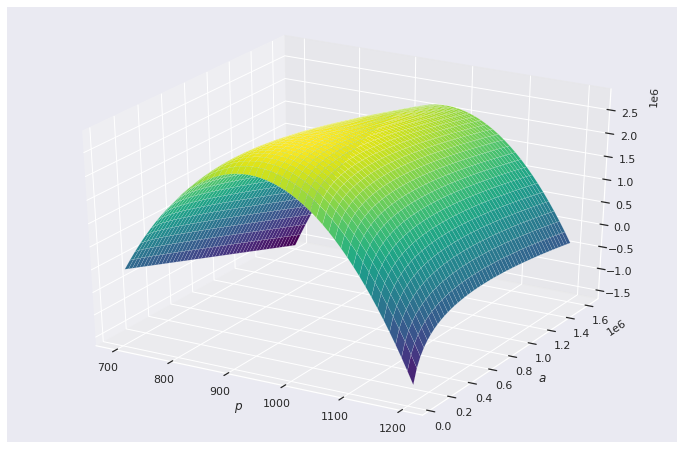

In [ ]:
plot3d(L, (p, 700, 1200), (a, 50_000, 1_600_000), xlabel='$p$', ylabel='$a$', zlabel='Lucro')

#### Passo 2 - Abordagem de modelagem
 
Problema de otimização multidimensional sem restrição cujo objetivo é maximizar o lucro obtido pela venda de computadores pessoais sem respeitar o orçamento máximo para publicidade, conforme o enuncado da questão.
 


#### Passo 3 - Formulação do modelo
 
$$
\begin{align}
\text{max} ~~& f(p, a) \\
\text{sujeito a} ~~& p, a \in \Omega \\
\end{align}
$$
 
Sendo:
* $f(p, a)$: Função objetivo
* $\Omega$: Espaço viável das variáveis do problema.
 
Dado que não é aplicado qualquer restrição, temos:
 
$$
\begin{align}
\text{max} ~~& f(p, a) = R - C - a \\
\end{align}
$$


#### Passo 4 - Resolução do modelo
 
Função a ser otimizada:

In [ ]:
f_a = L
Math(f"f(p, a)={latex(f_a)}")

<IPython.core.display.Math object>

O vetor gradiente
$$\nabla f(p, a) = 
\left[
\begin{matrix}
    \frac{\partial f(p, a)}{\partial p} \\
    \frac{\partial f(p, a)}{\partial a}
\end{matrix}
\right]
$$
como

In [ ]:
grad_f = Matrix(derive_by_array(f_a, (p, a)))

display(Math(f"\\nabla f(p, a) = {latex(grad_f)}."))

<IPython.core.display.Math object>

Calculando $\nabla f(p, a) = \mathbf{0}$, temos duas soluções

In [ ]:
solucoes_a = solve(grad_f, [p, a], dict=True, rational=True)

display(Math(f"""
\\begin{{aligned}}
\mathbf{{0}} &= \\nabla f(p, a) \\\\
\mathbf{{0}} &= {latex(grad_f)}
\\end{{aligned}}
"""))
for i, solucao in enumerate(solucoes_a):
    display(Math(f"""
\\begin{{aligned}}
\\text{{\\textbf{{Solução {i+1}}}}} &  \\\\
p &= {latex(solucao[p])} = {latex(N(solucao[p]))} \\\\
a &= {latex(solucao[a])} = {latex(N(solucao[a]))} \\\\
\\text{{Lucro: }} & {latex(N(L.subs(solucao)))} \\\\
\\end{{aligned}}
    """))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Nota-se que a primeira solução trata o problema como um problema de minimização, enquanto que a segunda solução apresenta o valor para o caso de maximização.

#### Passo 5 - Resposta da pergunta

A resposta obtida pelo modelo matemático proposto é que o lucro máximo obtido passará de $\$2{,}450{,}000$ para $\$2{,}852{,}652.25275005$ ao
* aumentar de $\$50{,}000$ para $\$366{,}040.641152074$ de investimento em publicidade;
* aumentar o valor do produto de $\$950$ para aproximadamente $\$953.72$.

### b) determine the sensitivity of the decision variables (price and advertising budget) to price elasticity (the 50% number).

Suponhamos que a elasticidade do preço não seja mais o valor fixo $0.5$, mas dependa de uma variável $r$.

Assim, temos a função $f(p, a;r)$ sendo como:

In [ ]:
p, a, r = var('p, a, r', real=True)
 
c = 700
p_original = 950
a_original = 50_000
s_original = 10_000
 
s_desconto = s_original * r * (p_original - p) / 100
s_propaganda = 1_000 * log(a/a_original, 2)
 
s = s_original + s_desconto + s_propaganda
 
C = c*s
R = p*s
L = R - C - a
 
f_b = L
Math(f"f(p, a; r) = {latex(f_b)}")

<IPython.core.display.Math object>

As derivadas parciais primeiras como:

In [ ]:
dfdp = diff(f_b, p)
dfda = diff(f_b, a)

Math(f"""
\\begin{{aligned}}
\\frac{{\\partial}}{{\\partial p}} df(p,a;r) &= {latex(dfdp)} \\\\
\\frac{{\\partial}}{{\\partial a}} df(p,a;r) &= {latex(dfda)}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Igualando-as a zero, teremos:

In [ ]:
##Só achou uma solução, provavelmente a correlata a equação 1
# s_b = solve([N(dfdp), N(dfda)], [p, a], dict=True, rational=True)[0]

# Math(f"""
# \\begin{{aligned}}
# p &= {latex(N(s_b[p]))} \\\\
# a &= {latex(s_b[a])}
# \\end{{aligned}}
# """)

Infelizmente, a ferramenta Sympy não conseguiu achar as duas soluções. 
Deste modo, faremos este item por meio de uma estimativa numérica da sensibilidade.

Assumamos que $r=0.505$, ou seja, com incremento de $1\%$ em relação ao item a). Executemos o método de Newton, definindo explicitamente que $r=0.505$. Deste modo, teremos $f(p, a; r)$ como sendo:

In [ ]:
def MetodoNewton(variaveis, valores_iniciais, funcao, numero_iteracoes=10):
    num_variaveis = len(variaveis)
    x_ = np.zeros((num_variaveis, numero_iteracoes+1))
    
    x_[:, 0] = valores_iniciais

    f = lambdify(variaveis, funcao, 'numpy')

    gradiente = Matrix(derive_by_array(funcao, variaveis))
    gradiente_f_original = lambdify(variaveis, gradiente, 'numpy')
    gradiente_f = lambda vetor: gradiente_f_original(*vetor.T.flatten())

    hessiana = hessian(funcao, variaveis)

    hessiana_inversa_f_original = lambdify(variaveis, hessiana.inv(), 'numpy')
    hessiana_inversa_f = lambda vetor: hessiana_inversa_f_original(*vetor.T.flatten())
    
    for k in range(numero_iteracoes):
        x_k = x_[:, [k]]

        x_k_next = x_k - hessiana_inversa_f(x_k) @ gradiente_f(x_k)
        x_[:, k+1] = x_k_next.T
    
    retorno = {f'{variavel}': x_[i] for i, variavel in enumerate(variaveis)}
    retorno[f'f{Tuple(*variaveis)}'] = [f(*x_i) for x_i in x_.T]
    
    return pd.DataFrame(retorno)

In [ ]:
#@title Valor de `r` { vertical-output: true, display-mode: "form" }
 
valor_r = 0.505 #@param {type:"number"}

valores = {
    r: valor_r
}
 
Math(f"f(p, a) = f(p, a; r={valor_r}) = {latex(f_b.subs(valores))}")

<IPython.core.display.Math object>

O resultado do método de Newton é apresentado na tabela abaixo. Os valores de $p$, de $a$ e de $f(p, a)$ são apresentados para cada $i$-ésima iteração ($i$-ésima linha).

In [ ]:
resultado_newton_b = MetodoNewton(
    variaveis=(p, a,),
    valores_iniciais=(1, 1),
    funcao=f_b.subs(valores),
    numero_iteracoes=25
)
resultado_newton_b

,p,a,"f(p, a)"
0,1.000000,1.000000,-2.957809e+07
1,768.068045,0.902622,2.334804e+05
2,786.053891,2.043738,3.184704e+05
3,795.524994,4.312377,4.107370e+05
4,806.217639,9.107327,5.139139e+05
5,816.707693,19.113552,6.276518e+05
6,827.165214,39.937592,7.519123e+05
7,837.579913,83.137337,8.866192e+05
8,847.957381,172.510789,1.031690e+06
9,858.299777,356.940868,1.187012e+06


Podemos obter uma estimativa das sensibilidades, comparando com os resultados do item a) com este item. Para calcular $S(p, r)$, a sensibilidade de $p$ em função de $r$, façamos
$$
S(p, r) = \frac{p^{*_b}}{p^{*_a}} - 1,
$$
sendo $p^{*_n}$ a variável $p$ no ponto ótimo no item $n$ desta questão,
$$
S(a, r) = \frac{a^{*_b}}{a^{*_a}} - 1,
$$
sendo $a^{*_n}$ a variável $a$ no ponto ótimo no item $n$ desta questão.

In [ ]:
valor_p_a, valor_a_a, valor_f_a = solucoes_a[1][p], solucoes_a[1][a], N(f_a.subs(solucoes_a[1]))
valor_p_b, valor_a_b, valor_f_b = resultado_newton_b.iloc[-1]


display(Math(f"""
\\begin{{aligned}}
S(p, r) &= \\frac{{{N(valor_p_b)}}}{{{N(valor_p_a)}}} -1 = {(N(valor_p_b)/N(valor_p_a) - 1) * 100}\%\\\\
S(a, r) &= \\frac{{{N(valor_a_b)}}}{{{N(valor_a_a)}}} -1 = {(N(valor_a_b)/N(valor_a_a) - 1) * 100}\%
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

Podemos então concluir que para cada $1\%$ de variação de crescimento de $r$, tem-se uma redução de aproximadamente $0.1416\%$  no valor do produto ($p$) e uma redução de $0.5324\%$ no total gasto em publicidade ($a$).

### c) Determine the sensitivity of the decision variables to the advertising agency's estimate of $1{,}000$ new sales each time the advertising budget is doubled.

Suponhamos que a quantidade de vendas que aumenta a cada vez que as despesas com publicidade dobra não seja mais o valor fixo de $\$1{,}000$, mas dependa de uma variável $r$.

Assim, temos a função $f(p, a;r)$ sendo como:


In [ ]:
p, a, r = var('p, a, r', real=True)

c = 700
p_original = 950
a_original = 50_000
s_original = 10_000

s_desconto = s_original * 0.5 * (p_original - p) / 100
s_propaganda = r * log(a/a_original, 2)

s = s_original + s_desconto + s_propaganda

C = c*s
R = p*s
L = R - C - a

f_c = L
Math(f"f(p, a; r) = {latex(f_c)}")

<IPython.core.display.Math object>

As derivadas parciais primeiras como:

In [ ]:
dfdp = diff(f_c, p)
dfda = diff(f_c, a)

Math(f"""
\\begin{{aligned}}
\\frac{{\\partial}}{{\\partial p}} df(p,a;r) &= {latex(dfdp)} \\\\
\\frac{{\\partial}}{{\\partial a}} df(p,a;r) &= {latex(dfda)}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Igualando-as a zero, teremos:

In [ ]:
##Só achou uma solução, provavelmente a correlata a equação 1
# s_c = solve([dfdp, dfda], [p, a], dict=True, rational=True)[0]

# Math(f"""
# \\begin{{aligned}}
# p &= {latex(N(s_c[p]))} \\\\
# a &= {latex(s_c[a])}
# \\end{{aligned}}
# """)

Infelizmente, a ferramenta Sympy não conseguiu achar as duas soluções. 
Deste modo, faremos este item por meio de uma estimativa numérica da sensibilidade.

Assumamos que $r=1{,}010$, ou seja, com incremento de $1\%$ em relação ao item a). Executemos o método de Newton, definindo explicitamente que $r=1{,}010$. Deste modo, teremos $f(p, a; r)$ como sendo:

In [ ]:
#@title Valor de `r` { vertical-output: true, display-mode: "form" }
 
valor_r = 1010 #@param {type:"number"}

valores = {
    r: valor_r
}
 
Math(f"f(p, a) = f(p, a; r={valor_r}) = {latex(f_b.subs(valores))}")

<IPython.core.display.Math object>

O resultado do método de Newton é apresentado na tabela abaixo. Os valores de $p$, de $a$ e de $f(p, a)$ são apresentados para cada $i$-ésima iteração ($i$-ésima linha).

In [ ]:
resultado_newton_c = MetodoNewton(
    variaveis=(p, a,),
    valores_iniciais=(1, 1),
    funcao=f_c.subs(valores),
    numero_iteracoes=25
)
resultado_newton_c

,p,a,"f(p, a)"
0,1.000000,1.000000,-2.913730e+07
1,765.967500,0.905627,2.171276e+05
2,784.580665,2.066774,3.013660e+05
3,794.138785,4.367071,3.930492e+05
4,805.087386,9.241905,4.960207e+05
5,815.801259,19.425483,6.098916e+05
6,826.483030,40.640580,7.346246e+05
7,837.118897,84.689636,8.701367e+05
8,847.715266,175.888079,1.016341e+06
9,858.274543,364.205609,1.173120e+06


Podemos obter uma estimativa das sensibilidades, comparando com os resultados do item a) com este item. Para calcular $S(p, r)$, a sensibilidade de $p$ em função de $r$, façamos
$$
S(p, r) = \frac{p^{*_c}}{p^{*_a}} - 1,
$$
sendo $p^{*_n}$ a variável $p$ no ponto ótimo no item $n$ desta questão,
$$
S(a, r) = \frac{a^{*_c}}{a^{*_a}} - 1,
$$
sendo $a^{*_n}$ a variável $a$ no ponto ótimo no item $n$ desta questão.

In [ ]:
valor_p_a, valor_a_a, valor_f_a = solucoes_a[1][p], solucoes_a[1][a], N(f_a.subs(solucoes_a[1]))
valor_p_c, valor_a_c, valor_f_c = resultado_newton_c.iloc[-1]


display(Math(f"""
\\begin{{aligned}}
S(p, r) &= \\frac{{{N(valor_p_c)}}}{{{N(valor_p_a)}}} -1 = {(N(valor_p_c)/N(valor_p_a) - 1) * 100}\%\\\\
S(a, r) &= \\frac{{{N(valor_a_c)}}}{{{N(valor_a_a)}}} -1 = {(N(valor_a_c)/N(valor_a_a) - 1) * 100}\%
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

Podemos então concluir que para cada $1\%$ de variação de crescimento de $r$, tem-se aproximadamente $0.0481\%$ de variação de crescimento no valor do produto ($p$) e $1.1825\%$ no total gasto em publicidade ($a$).

### d) What goes wrong in part (a) if we assume a linear relationship between advertising budget and sales?  Why wasn’t this an issue in Exercise 6 of Chapter 2?
 
Considerando uma relação linear entre o orçamento de publicidade e as vendas no item a) desta questão, haveria um problema, pois o lucro tenderia ao infinito já que não existe um orçamento máximo que se possa gastar em publicidade. Ou seja, quanto mais se investe em publicidade mais se lucra o que é impossível na realidade, pois existe um limite para se gastar. Já na questão 6 do capítulo 2, não houve este problema, pois existia um limite máximo para o gasto em publicidade que era 100,000.